<a href="https://colab.research.google.com/github/shimiiizu/Rotation_test01/blob/main/%E6%91%BA%E6%93%A6%E5%9B%9E%E6%95%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 摺擦回数の計算

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 空のデータフレームの作成

col = ['page','toner_weight','K']
df = pd.DataFrame(columns=col)

# 耐久枚数のリストを作成

page_moto_list = list(range(0, 21, 1))

page_list = [x * 100 for x in page_moto_list]
df['page']=page_list

# 摺擦回数・トナー重量のリストの作成

In [6]:
# 1枚当たりの通過トナー量d　= ノリ量×現像移動距離×コート幅
d = 1

# 摺擦回数の初期値：K0
K_ini = 0

# 補給開始トナー量：t
toner_supply_weight = 60

# ★初期充填量
toner_weight_ini = 100

# ★消費量
s = 0.06

# ★補給タイミング
supply_timing = 10

# 初期リスト
toner_weight_list = [toner_weight_ini]
K_list = [K_ini]

for index, page in enumerate(page_list):
  if index > 0 and index < supply_timing:

    toner_weight_list.append(toner_weight_ini - s*page)
    K_list.append(K_list[index-1] + d / toner_weight_list[index])

  # 補給タイミングの処理
  elif index == supply_timing:

    # トナー量リセット
    toner_weight_list.append(toner_weight_list[index - 1] + toner_supply_weight)

    # 摺擦回数リセット
    K_s1 = K_list[supply_timing - 1] * toner_weight_list[supply_timing - 1] / toner_weight_list[supply_timing]
    K_list.append(K_s1 + d / toner_weight_list[supply_timing])

  elif index > supply_timing:

    toner_weight_list.append(toner_weight_list[supply_timing] - s*(page-supply_timing*100))
    K_list.append(K_list[index-1] + d / toner_weight_list[index])


# データフレームに挿入
df['K'] = K_list
df['toner_weight'] = toner_weight_list
#df

Text(0, 0.5, 'K')

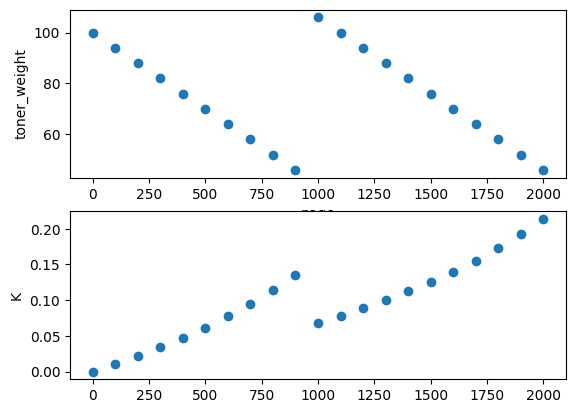

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].scatter(df['page'],df['toner_weight'])
ax[1].scatter(df['page'],df['K'])
ax[0].set_xlabel('page')
ax[0].set_ylabel('toner_weight')
ax[1].set_ylabel('K')